# INTRODUCTION

### The most recent film failed miserably at the box office, grossing barely £100,000. So, in order to keep the production firm afloat, being a data scientist my target is to come up with a plan so that they can secure a solid return on £1.5 million investment over the following year.

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



###  READING THE DATASET

In [2]:
file = 'movie_metadata.csv'
df = pd.read_csv(file) # DATASET STORED IN df
df



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### UNDERSTANDING THE DATASET

In [3]:
df.head() #  CHECKING FIRST 5 ROWS

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.tail() # CHECKING LAST 5 ROWS

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
print("Number of Rows",df.shape[0]) # NUMBER OF ROWS
print("Number of Columns",df.shape[1]) # NUMBER OF COLUMNS


Number of Rows 5043
Number of Columns 28


In [6]:
df.info() # INFORMATION ABOUT DATA (NO. OF ROWS, NO. OF COLUMNS, MEMORY REQUIREMENT AND DATATYPES OF EACH COLUMN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
df.describe().transpose() # OVERALL STATISTICS ABOUT THE DATA

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


### DROPPING UNNECESSARY COLUMNS


In [8]:
df.columns # CHECKING ALL THE COLUMNS IN THE DATASET

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
corr_matrix = df.corr() # CORRELATION MATRIX
corr_matrix

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


<AxesSubplot:>

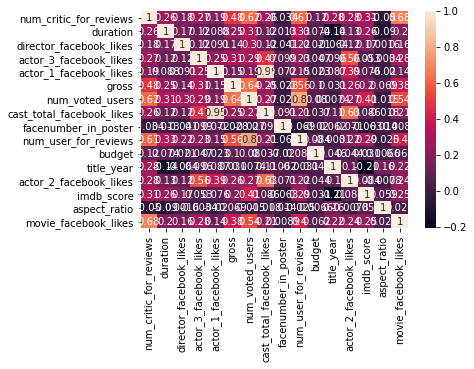

In [10]:
sns.heatmap(corr_matrix,annot=True) # HEATMAP

In [11]:
df = df.drop(['color', 
                      'director_facebook_likes',    # DROPPING THE COLUMNS THAT I THINK WILL NOT BE REQUIRED FOR ANALYSIS 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating',  
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      'actor_2_name',
                    'movie_facebook_likes',
                      'actor_3_name'], 
                       axis = 1)

In [12]:
df # CHECKING NEW DATASET

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1
2,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5
4,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6.0,English,Canada,NaN,2013.0,7.7
5039,NaN,43.0,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359.0,English,USA,NaN,NaN,7.5
5040,Benjamin Roberds,13.0,76.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3.0,English,USA,1400.0,2013.0,6.3
5041,Daniel Hsia,14.0,100.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9.0,English,USA,NaN,2012.0,6.3


### CHECKING AND DEALING WITH NULL VALUES AND DUPLICATE VALUES


In [13]:
df.duplicated().sum() # CHECKING FOR DUPLICATE VALUES IF ANY

47

In [14]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True) # DROPPING DUPLICATE VALUES


In [15]:
df.duplicated().sum() # CHECKING DUPLICATE VALUES AFTER DROPPING

0

In [16]:
df.isnull().sum(axis=0).sort_values(ascending=False) # CHECKING NULL VALUES FOR COLUMNS

gross                     873
budget                    486
title_year                107
director_name             103
num_critic_for_reviews     49
num_user_for_reviews       21
duration                   15
language                   12
actor_1_name                7
country                     5
genres                      0
movie_title                 0
num_voted_users             0
imdb_score                  0
dtype: int64

In [17]:
df.isnull().sum(axis=1).sort_values(ascending=False) # CHECKING NULL VALUES FOR ROWS

4       8
279     7
2370    7
2342    6
4634    5
       ..
1698    0
1697    0
1696    0
1695    0
5042    0
Length: 4996, dtype: int64

<AxesSubplot:>

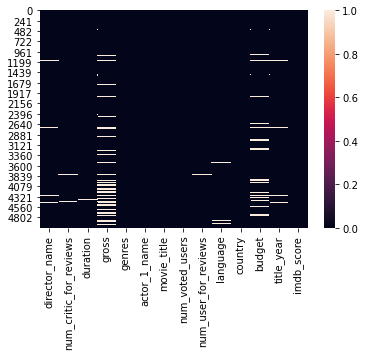

In [18]:
sns.heatmap(df.isnull()) # VISUALISING NULL VALUES

In [19]:
 df.isnull().sum().sort_values(ascending=False)*100/len(df) # PERCENTAGE OF NULL VALUES OF EACH COLUMN

gross                     17.473979
budget                     9.727782
title_year                 2.141713
director_name              2.061649
num_critic_for_reviews     0.980785
num_user_for_reviews       0.420336
duration                   0.300240
language                   0.240192
actor_1_name               0.140112
country                    0.100080
genres                     0.000000
movie_title                0.000000
num_voted_users            0.000000
imdb_score                 0.000000
dtype: float64

In [20]:
df = df[df['gross'].notnull()] # TAKING ONLY NON NULL VALUES FOR GROSS 
df = df[df['budget'].notnull()] # TAKING ONLY NON NULL VALUES FOR BUDGET

In [21]:
df.isnull().sum().sort_values(ascending=False)*100/len(df) # PERCENTAGE OF NULL VALUES OF EACH COLUMN NOW

actor_1_name              0.077801
language                  0.077801
num_critic_for_reviews    0.025934
duration                  0.025934
director_name             0.000000
gross                     0.000000
genres                    0.000000
movie_title               0.000000
num_voted_users           0.000000
num_user_for_reviews      0.000000
country                   0.000000
budget                    0.000000
title_year                0.000000
imdb_score                0.000000
dtype: float64

In [22]:
df.language.describe() # WILL FILL MISSING VALUES IN LANGUAGE WITH ENGLISH SINCE IT'S THE LANGUAGE IN WHICH MOST FILMS ARE THERE AND LANGUAGE COLUMN CAN BE USEFUL FOR ANALYSIS SO CAN'T DROP IT

count        3853
unique         38
top       English
freq         3673
Name: language, dtype: object

In [23]:
 df.language = df.language.fillna('English') # UPDATING NULL VALUES IN LANGUAGE WITH ENGLISH

In [24]:
df.isnull().sum().sort_values(ascending=False)*100/len(df) # PERCENTAGE OF MISSING VALUES OF EACH COLUMN NOW

actor_1_name              0.077801
num_critic_for_reviews    0.025934
duration                  0.025934
director_name             0.000000
gross                     0.000000
genres                    0.000000
movie_title               0.000000
num_voted_users           0.000000
num_user_for_reviews      0.000000
language                  0.000000
country                   0.000000
budget                    0.000000
title_year                0.000000
imdb_score                0.000000
dtype: float64

In [25]:
df.dropna(inplace=True) # DROPPING NULL VALUES



In [26]:
df.isnull().sum().sort_values(ascending=False)*100/len(df) # NULL VALUES LEFT IN TERMS OF PERCENTAGE

director_name             0.0
num_critic_for_reviews    0.0
duration                  0.0
gross                     0.0
genres                    0.0
actor_1_name              0.0
movie_title               0.0
num_voted_users           0.0
num_user_for_reviews      0.0
language                  0.0
country                   0.0
budget                    0.0
title_year                0.0
imdb_score                0.0
dtype: float64

<AxesSubplot:>

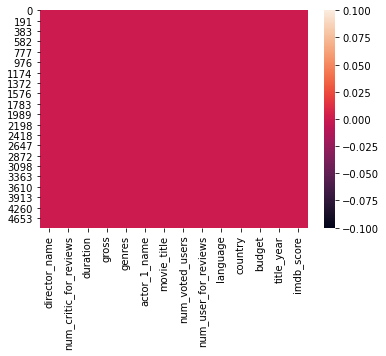

In [27]:
sns.heatmap(df.isnull()) # VISUALISING NULL VALUES AFTER CLEANING

### DATA ANALYSIS

In [28]:
df['budget']=df['budget']/1000000 # CONVERTING BUDGET INTO MILLIONS
df['gross']=df['gross']/1000000 # CONVERTING GROSS INTO MILLIONS

In [29]:
df.columns= ['director_name', 'num_critic_for_reviews', 'duration','gross in millions', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'country', 'budget in millions', 'title_year','imdb_score'] # RENAMING THE COLUMNS
df

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237.0000,2009.0,7.9
1,Gore Verbinski,302.0,169.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300.0000,2007.0,7.1
2,Sam Mendes,602.0,148.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245.0000,2015.0,6.8
3,Christopher Nolan,813.0,164.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250.0000,2012.0,8.5
5,Andrew Stanton,462.0,132.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263.7000,2012.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,0.0070,2004.0,7.0
5034,Neill Dela Llana,35.0,80.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.0070,2005.0,6.3
5035,Robert Rodriguez,56.0,81.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.0070,1992.0,6.9
5037,Edward Burns,14.0,95.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.0090,2011.0,6.4


In [30]:
df['profit in millions'] = df['gross in millions']-df['budget in millions'] # CREATING NEW COLUMN PROFIT WHERE PROFIT = GROSS - BUDGET
                                                                              
df

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237.0000,2009.0,7.9,523.505847
1,Gore Verbinski,302.0,169.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300.0000,2007.0,7.1,9.404152
2,Sam Mendes,602.0,148.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245.0000,2015.0,6.8,-44.925825
3,Christopher Nolan,813.0,164.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250.0000,2012.0,8.5,198.130642
5,Andrew Stanton,462.0,132.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263.7000,2012.0,6.6,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,0.0070,2004.0,7.0,0.417760
5034,Neill Dela Llana,35.0,80.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.0070,2005.0,6.3,0.063071
5035,Robert Rodriguez,56.0,81.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.0070,1992.0,6.9,2.033920
5037,Edward Burns,14.0,95.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.0090,2011.0,6.4,-0.004416


In [31]:
corr_matrix = df.corr() # CORRELATION MATRIX
corr_matrix

,num_critic_for_reviews,duration,gross in millions,num_voted_users,num_user_for_reviews,budget in millions,title_year,imdb_score,profit in millions
num_critic_for_reviews,1.000000,0.237754,0.473480,0.599361,0.572138,0.106800,0.393442,0.342904,0.039432
duration,0.237754,1.000000,0.249497,0.343238,0.356339,0.068828,-0.129147,0.359976,0.008434
gross in millions,0.473480,0.249497,1.000000,0.629083,0.553225,0.100930,0.045277,0.212508,0.205872
num_voted_users,0.599361,0.343238,0.629083,1.000000,0.782640,0.068198,0.017093,0.473832,0.124883
num_user_for_reviews,0.572138,0.356339,0.553225,0.782640,1.000000,0.073122,0.013028,0.320453,0.096892
budget in millions,0.106800,0.068828,0.100930,0.068198,0.073122,1.000000,0.044343,0.029550,-0.952803
title_year,0.393442,-0.129147,0.045277,0.017093,0.013028,0.044343,1.000000,-0.127933,-0.029799
imdb_score,0.342904,0.359976,0.212508,0.473832,0.320453,0.029550,-0.127933,1.000000,0.035780
profit in millions,0.039432,0.008434,0.205872,0.124883,0.096892,-0.952803,-0.029799,0.035780,1.000000


<AxesSubplot:>

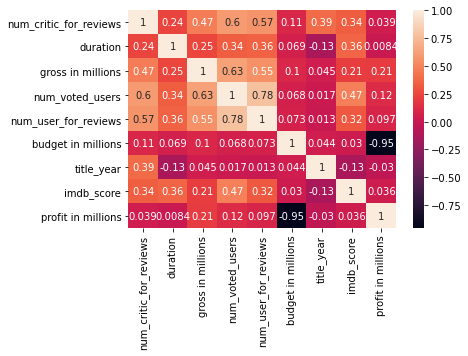

In [32]:
sns.heatmap(corr_matrix,annot=True) # HEATMAP

##### SPLITTING OUR DATASET INTO TWO TO USE ONE FOR HYPOTHESIS AND ANOTHER ONE FOR EDA

In [33]:
eda_set = df.sample(frac = 0.5) # DATASET FOR EXPLORATORY DATA ANALYSIS 
hypo_set = df.drop(eda_set.index) # DATASET FOR HYPOTHESIS TESTING

In [34]:
eda_set.head() # DISPLAYING FIRST 5 ROWS

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
417,Rob Marshall,229.0,145.0,57.010853,Drama|Romance,Li Gong,Memoirs of a Geisha,119286,548.0,English,USA,85.0,2005.0,7.3,-27.989147
1101,Garth Jennings,276.0,109.0,51.019112,Adventure|Comedy|Sci-Fi,Zooey Deschanel,The Hitchhiker's Guide to the Galaxy,155745,1053.0,English,USA,50.0,2005.0,6.8,1.019112
1001,Rob Reiner,99.0,95.0,27.067160,Comedy|Drama|Romance,Bruce Willis,The Story of Us,18404,150.0,English,USA,50.0,1999.0,5.9,-22.932840
1897,Gabor Csupo,181.0,96.0,82.234139,Adventure|Drama|Family|Fantasy,Josh Hutcherson,Bridge to Terabithia,110390,522.0,English,USA,17.0,2007.0,7.2,65.234139
2610,Udayan Prasad,60.0,102.0,0.317040,Drama|Romance,Kristen Stewart,The Yellow Handkerchief,6723,36.0,English,USA,15.5,2008.0,6.8,-15.182960


In [35]:
eda_set.tail() # DISPLAYING LAST 5 ROWS

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
3763,Jay Levey,59.0,150.0,6.157157,Comedy|Drama,Fran Drescher,UHF,21416,198.0,English,USA,5.0,1989.0,7.0,1.157157
3114,Marcus Raboy,26.0,85.0,32.983713,Comedy|Drama,John Witherspoon,Friday After Next,19284,66.0,English,USA,20.0,2002.0,5.8,12.983713
1702,James Wong,130.0,100.0,9.353573,Action|Adventure|Fantasy|Sci-Fi|Thriller,Ian Whyte,Dragonball: Evolution,56451,524.0,English,USA,45.0,2009.0,2.7,-35.646427
617,Adam Shankman,360.0,136.0,38.509342,Comedy|Drama|Musical|Romance,James Martin Kelly,Rock of Ages,61995,356.0,English,USA,75.0,2012.0,5.9,-36.490658
701,Keenen Ivory Wayans,78.0,98.0,58.255287,Comedy|Crime,Chazz Palminteri,Littleman,39471,187.0,English,USA,64.0,2006.0,4.3,-5.744713


In [36]:
num_eda_set = eda_set.select_dtypes(include=['float64', 'int64']) #separating numerical features from the categorical

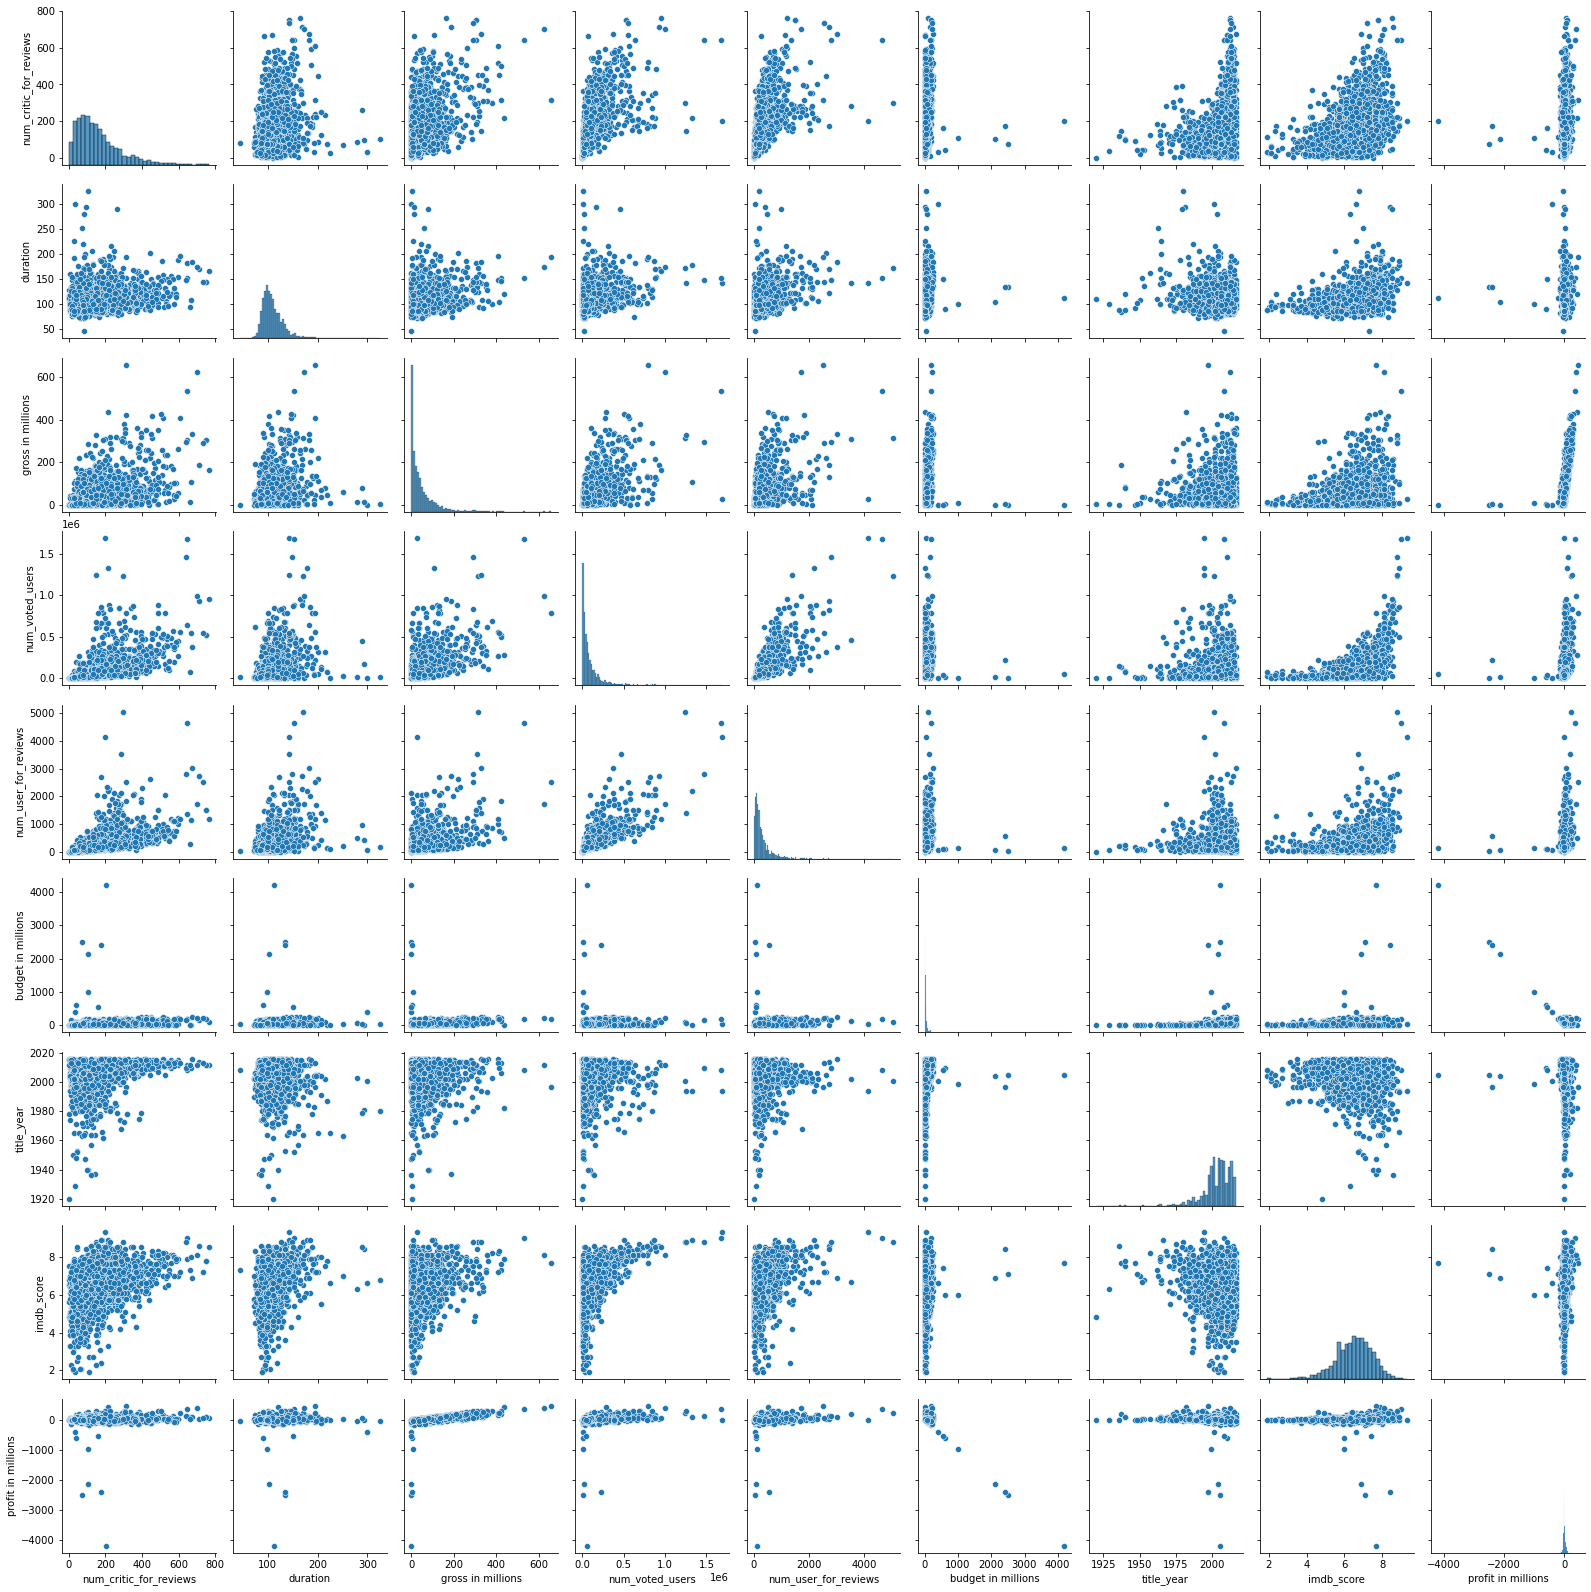

In [37]:
sns.pairplot(num_eda_set); #visualizing numerical features using pairplot

In [38]:
corr_matrix = eda_set.corr() # CORRELATION MATRIX
corr_matrix

,num_critic_for_reviews,duration,gross in millions,num_voted_users,num_user_for_reviews,budget in millions,title_year,imdb_score,profit in millions
num_critic_for_reviews,1.000000,0.238405,0.461606,0.591363,0.562905,0.124903,0.389012,0.352711,0.090782
duration,0.238405,1.000000,0.279564,0.341530,0.373720,0.123140,-0.113338,0.346986,0.009259
gross in millions,0.461606,0.279564,1.000000,0.605011,0.521400,0.154183,0.022605,0.206183,0.308720
num_voted_users,0.591363,0.341530,0.605011,1.000000,0.807147,0.099429,0.016355,0.466881,0.180862
num_user_for_reviews,0.562905,0.373720,0.521400,0.807147,1.000000,0.104634,0.011021,0.343343,0.137628
budget in millions,0.124903,0.123140,0.154183,0.099429,0.104634,1.000000,0.064737,0.050090,-0.892180
title_year,0.389012,-0.113338,0.022605,0.016355,0.011021,0.064737,1.000000,-0.116929,-0.051986
imdb_score,0.352711,0.346986,0.206183,0.466881,0.343343,0.050090,-0.116929,1.000000,0.046036
profit in millions,0.090782,0.009259,0.308720,0.180862,0.137628,-0.892180,-0.051986,0.046036,1.000000


<AxesSubplot:>

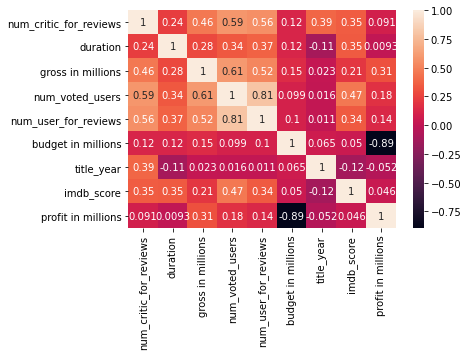

In [39]:
sns.heatmap(corr_matrix,annot=True) # HEATMAP

In [40]:
#creating a dataframe with profit > 0
movies_profitable = eda_set.loc[eda_set['profit in millions'] > 0]
movies_profitable_sorted = movies_profitable.sort_values(by = 'profit in millions', ascending = False)
movies_profitable_sorted.reset_index(inplace = True)
movies_profitable_sorted.head()

,index,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
0,26,James Cameron,315.0,194.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,USA,200.0,1997.0,7.7,458.672302
1,3080,Steven Spielberg,215.0,120.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,USA,10.5,1982.0,7.9,424.449459
2,17,Joss Whedon,703.0,173.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,USA,220.0,2012.0,8.1,403.279547
3,66,Christopher Nolan,645.0,152.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,USA,185.0,2008.0,9.0,348.316061
4,186,Francis Lawrence,502.0,146.0,424.645577,Adventure|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games: Catching Fire,498397,706.0,English,USA,130.0,2013.0,7.6,294.645577


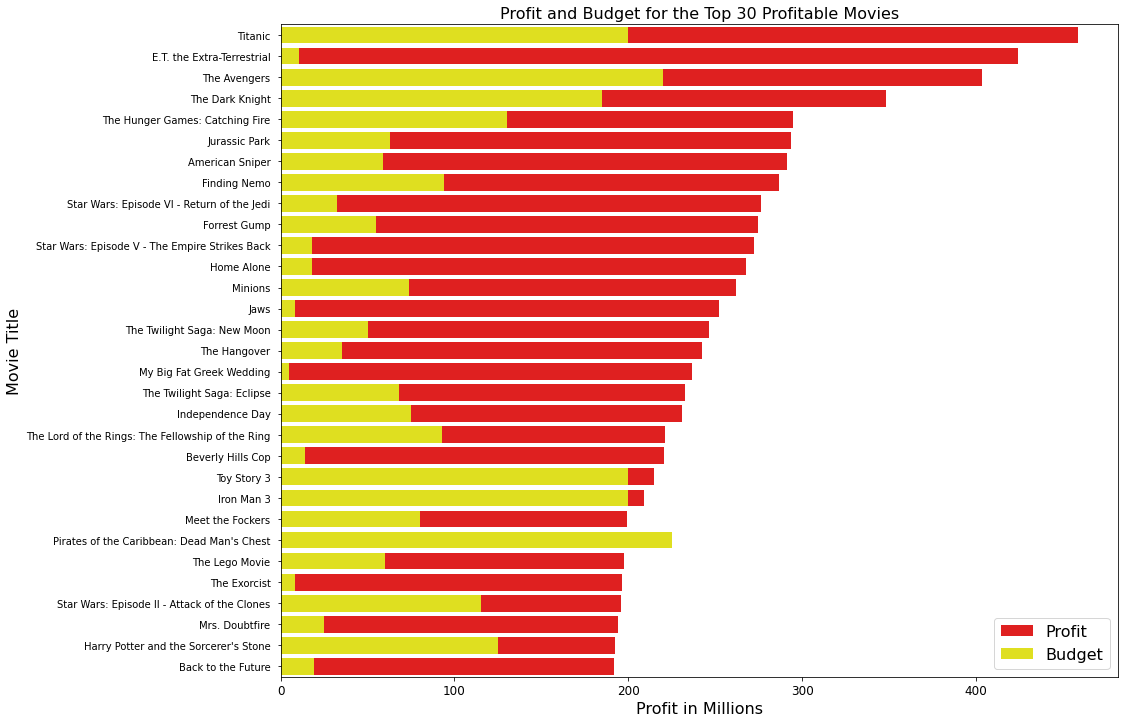

In [41]:
plt.figure(figsize=(15,12)) # PLOTTING PROFIT AND BUDGET FOR THE TOP 30 PROTIFABLE MOVIES

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'profit in millions'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'red', 
            label = 'Profit', 
            ci = None)

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'budget in millions'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'yellow', 
            label = 'Budget', 
            ci = None)

plt.xlabel('Profit in Millions', fontsize = 16)
plt.ylabel('Movie Title', fontsize = 16)
plt.title('Profit and Budget for the Top 30 Profitable Movies', fontsize = 16)
plt.xticks(rotation='horizontal', fontsize = 12)
plt.legend(fontsize = 16);

In [42]:
print('Average Budget value of the Top 30 successful Movies - ', # AVERAGE BUDGET VALUE OF TOP 30 SUCCESSFUL MOVIES
      round(movies_profitable_sorted.loc[0:29, 'budget in millions'].mean(), 2)) 
print('Median Budget value of the Top 30 successful Movies - ', # MEDIAN BUDGET OF TOP 30 SUCCESSFUL MOVIES
      movies_profitable_sorted.loc[0:29, 'budget in millions'].median())
print('Average Budget value of all movies with Profit greater than 0 - ', # Average Budget value of all movies with Profit greater than 0
      round(movies_profitable_sorted['budget in millions'].mean(), 2))
print('Median Budget value of all movies with Profit greater than 0 - ', # 'Median Budget value of all movies with Profit greater than 0
      movies_profitable_sorted['budget in millions'].median())

Average Budget value of the Top 30 successful Movies -  84.83
Median Budget value of the Top 30 successful Movies -  65.5
Average Budget value of all movies with Profit greater than 0 -  34.85
Median Budget value of all movies with Profit greater than 0 -  20.0


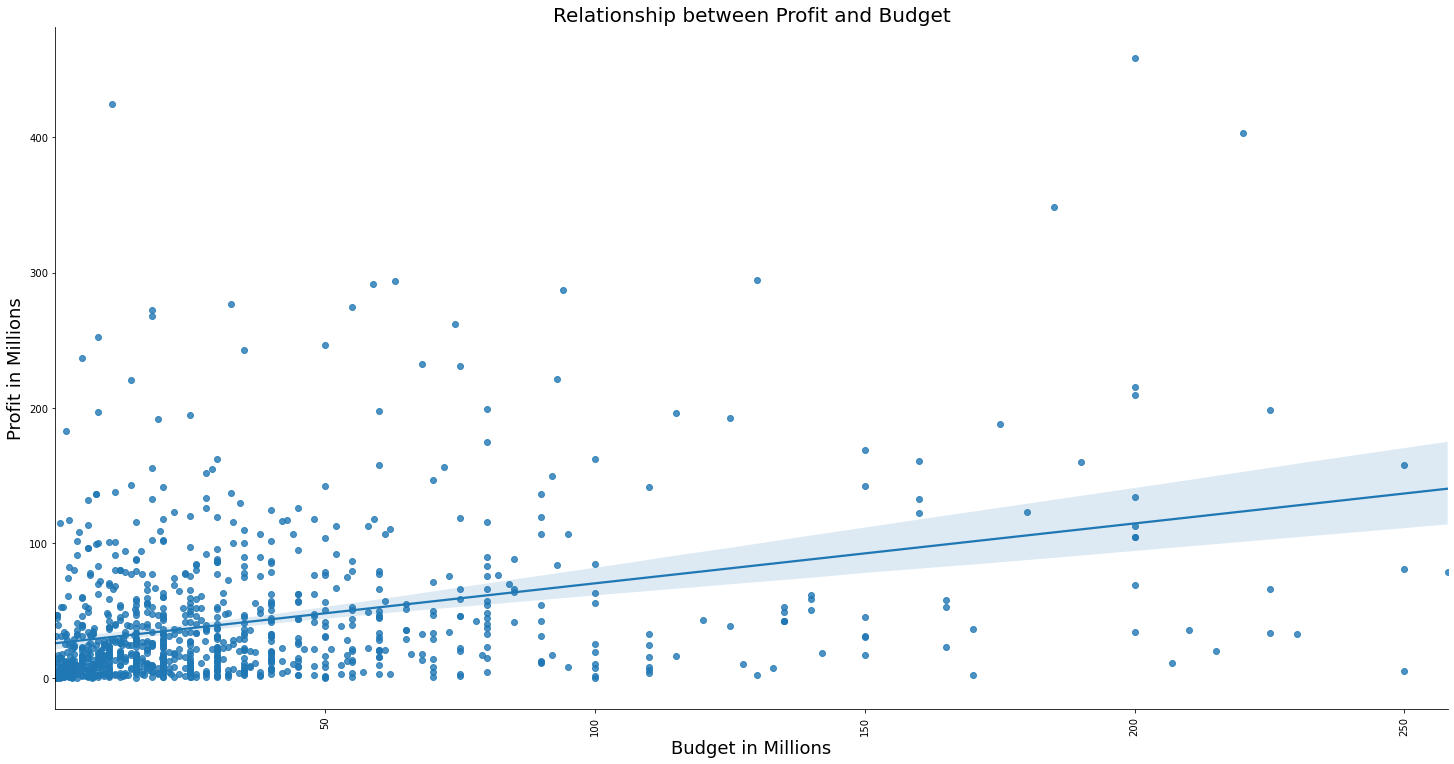

In [43]:
#visualizing the trend between profit vs budget
sns.lmplot(x = 'budget in millions', y = 'profit in millions', data = movies_profitable_sorted, height = 10, aspect = 2)
plt.ylabel('Profit in Millions', fontsize = 18)
plt.xlabel('Budget in Millions', fontsize = 18)
plt.title('Relationship between Profit and Budget', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show();

In [44]:
new_df = eda_set.loc[df['budget in millions'] <= 1.5] # STORING MOVIES WITH LESS THAN 1.5 MILLION BUDGET IN A NEW DATASET 
new_df

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
4856,Maria Maggenti,23.0,94.0,1.977544,Comedy|Drama|Romance,Nicole Ari Parker,The Incredibly True Adventure of Two Girls in ...,3513,36.0,English,USA,0.250000,1995.0,6.5,1.727544
4680,Ti West,292.0,101.0,0.077501,Horror,Lena Dunham,The Innkeepers,27260,247.0,English,USA,0.750000,2011.0,5.5,-0.672499
4353,James Marsh,194.0,90.0,2.957978,Biography|Crime|Documentary|History|Thriller,Paul McGill,Man on Wire,40481,134.0,English,UK,1.000000,2008.0,7.8,1.957978
4741,Morgan J. Freeman,17.0,86.0,0.334041,Crime|Drama|Romance,Edie Falco,Hurricane Streets,1038,21.0,English,USA,0.500000,1997.0,6.5,-0.165959
4671,Tommy Wirkola,224.0,91.0,0.041709,Comedy|Horror,Bjørn Sundquist,Dead Snow,54601,200.0,Norwegian,Norway,0.800000,2009.0,6.4,-0.758291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Terry Gilliam,131.0,91.0,1.229197,Adventure|Comedy|Fantasy,Eric Idle,Monty Python and the Holy Grail,382240,660.0,English,UK,0.229575,1975.0,8.3,0.999622
4811,Roger Nygard,43.0,86.0,0.617172,Documentary,Walter Koenig,Trekkies,4407,75.0,English,USA,0.375000,1997.0,7.0,0.242172
4583,Efram Potelle,29.0,79.0,0.279282,Comedy|Drama|Romance,Shiri Appleby,The Battle of Shaker Heights,3806,49.0,English,USA,1.000000,2003.0,6.1,-0.720718
4676,Matt Maiellaro,82.0,86.0,5.518918,Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,Tina Fey,Aqua Teen Hunger Force Colon Movie Film for Th...,12160,73.0,English,USA,0.750000,2007.0,6.9,4.768918


In [45]:
new_df.isnull().sum(axis=0) # CHECKING NULL VALUES IF ANY

director_name             0
num_critic_for_reviews    0
duration                  0
gross in millions         0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
country                   0
budget in millions        0
title_year                0
imdb_score                0
profit in millions        0
dtype: int64

In [46]:
new_df.describe().transpose() # CHECKING OVERALL STATISTICS OF THIS NEW DATASET

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,147.0,102.877551,94.191433,1.000000,34.000000,73.000000,145.000000,481.000
duration,147.0,95.312925,11.557363,75.000000,88.000000,93.000000,101.000000,160.000
gross in millions,147.0,5.218366,13.742636,0.000721,0.115570,0.592014,3.061875,115.000
num_voted_users,147.0,36384.380952,82473.092818,5.000000,2229.000000,6246.000000,30437.500000,664719.000
num_user_for_reviews,147.0,162.925170,235.105487,1.000000,31.000000,82.000000,192.500000,1473.000
budget in millions,147.0,0.696143,0.462113,0.000218,0.260000,0.700000,1.000000,1.500
title_year,147.0,1999.625850,15.418904,1920.000000,1997.500000,2004.000000,2009.000000,2014.000
imdb_score,147.0,6.675510,0.971342,3.300000,6.100000,6.900000,7.300000,8.900
profit in millions,147.0,4.522224,13.743431,-1.498479,-0.493306,0.201437,2.580531,114.223


<AxesSubplot:>

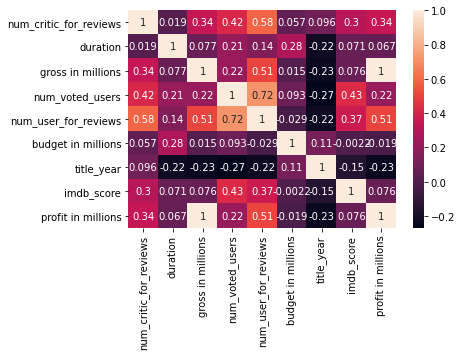

In [47]:
sns.heatmap(new_df.corr(),annot=True) # CHECKING CORRELATION

In [48]:
new_df.director_name.value_counts().head(10) # DIRECTORS WHO MADE THE MOST MOVIES WITHIN OUR BUDGET 

Ti West               2
Sergio Leone          2
John Carpenter        2
Rebecca Miller        1
Majid Majidi          1
Sue Corcoran          1
Renny Harlin          1
Quentin Dupieux       1
Greg Harrison         1
Jonathan Kesselman    1
Name: director_name, dtype: int64

###### WITHIN THE RESTRICTED BUDGET OF 1.5 MILLION GBP TI WEST , JOHN CARPENTER AND SERGIO LEONE DIRECTED THE MOST NUMBER OF FILMS

<AxesSubplot:ylabel='director_name'>

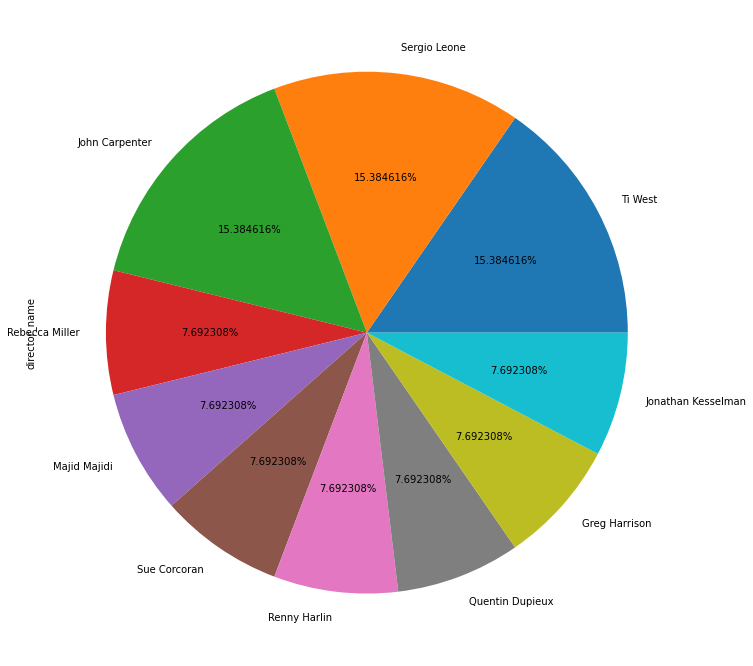

In [49]:
new_df['director_name'].value_counts()[:10].plot.pie(autopct="%f%%",figsize=(12,12)) # VISUALISING WITH THE HELP OF PIE CHART

In [50]:
top5_revenue_directors = new_df.groupby('director_name').agg({'profit in millions': 'mean'}).sort_values(by='profit in millions',ascending=False).head(5)
                              # DIRECTORS WHO GENERATED MOST PROFIT WITHIN OUR BUDGET OF 1.5 MILLION
top5_revenue_directors

,profit in millions
director_name,
George Lucas,114.223000
James Wan,52.491137
William Brent Bell,52.245055
John Carpenter,46.700000
Jared Hess,44.140956


##### GEORGE LUCAS, JAMES WAN, WILLIAM BRENT BELL, JOHN CARPENTER AND JARED HESS GENERATED MOST PROFITS IN THEIR FILMS  

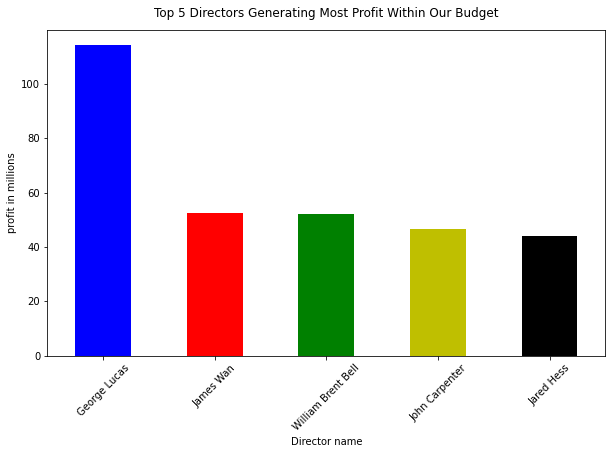

In [51]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_revenue_directors['profit in millions'].plot.bar(color=['b', 'r', 'g', 'y','k'],ax=ax)
ax.set_ylabel('profit in millions')
ax.set_title('Top 5 Directors Generating Most Profit Within Our Budget', y=1.02)
ax.set_xlabel('Director name')                                        # VISUALISING THE RESULTS WITH THE HELP OF BARPLOT
ax.set_xticklabels(top5_revenue_directors.index, rotation = 45);

###### MY RECOMMENDATION WOULD BE TO SELECT JOHN CARPENTER AS THE DIRECTOR BECAUSE HE IS COMMON IN DIRECTORS WHO DIRECTED MOST MOVIES AND IN THE LIST OF DIRECTORS WHO GENERATED MOST PROFIT IN THEIR FILMS

In [52]:
new_df.actor_1_name.value_counts().head(10) #  ACTORS WHO ACTED THE MOST IN THE MOVIES WITHIN OUR BUDGET 

Lena Dunham                3
Clint Eastwood             2
Jamie Lee Curtis           2
Brendan Doogie Milewski    1
Paul Schneider             1
John Amos                  1
David Arquette             1
Bill Farmer                1
Corbin Allred              1
Charles Napier             1
Name: actor_1_name, dtype: int64

###### WITHIN THE RESTRICTED BUDGET OF 1.5 MILLION GBP  LENA DURHAM, CLINT EASTWOOD AND  JAMIE LEE CURTIS  ACTED IN THE MOST NUMBER OF FILMS

<AxesSubplot:ylabel='actor_1_name'>

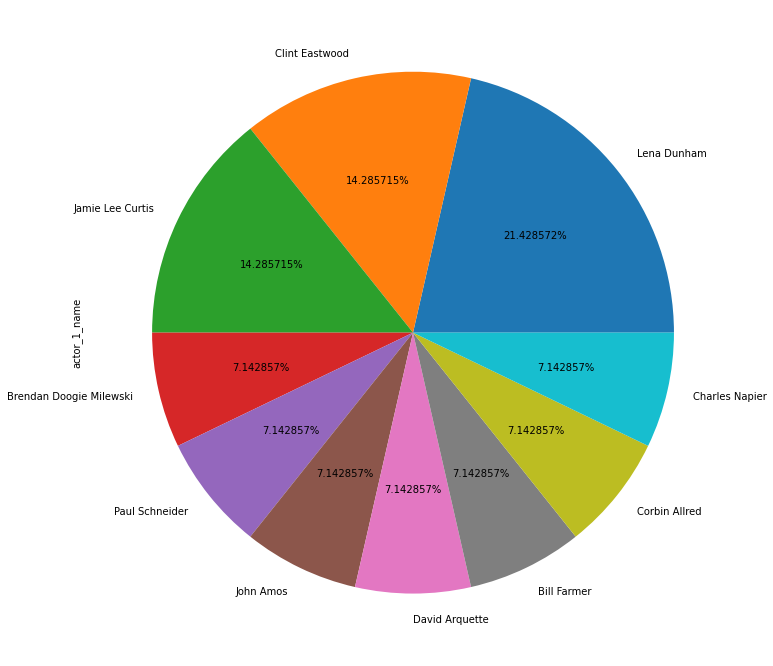

In [53]:
new_df['actor_1_name'].value_counts()[:10].plot.pie(autopct="%f%%",figsize=(12,12)) # VISUALISING WITH THE HELP OF PIE CHART

In [54]:
top5_profit_actors = new_df.groupby('actor_1_name').agg({'profit in millions': 'mean'}).sort_values(by='profit in millions',ascending=False).head(5)
                                # ACTORS WHO GENERATED MOST PROFIT WITHIN OUR BUDGET OF 1.5 MILLION
top5_profit_actors

,profit in millions
actor_1_name,
Harrison Ford,114.223000
Lin Shaye,52.491137
Fernanda Andrade,52.245055
Jamie Lee Curtis,46.700000
Jon Heder,44.140956


##### , Harrison Ford,  Lin Shaye,  Fernanda Andrade , Jamie Lee Curtis AND Jon Heder GENERATED THE MOST PROFITS FOR THEIR FILMS¶

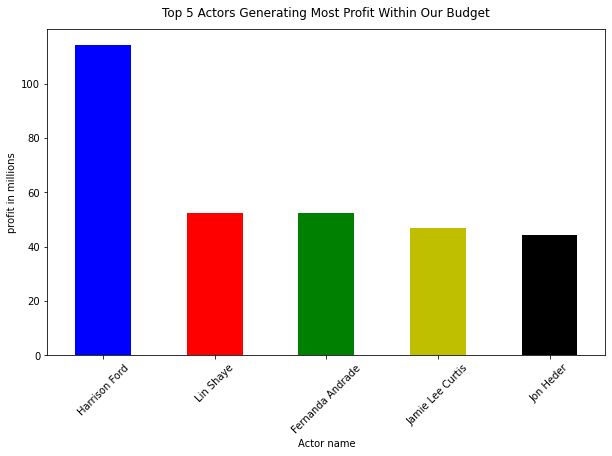

In [55]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_profit_actors['profit in millions'].plot.bar(color=['b', 'r', 'g', 'y','k'],ax=ax)
ax.set_ylabel('profit in millions')
ax.set_title('Top 5 Actors Generating Most Profit Within Our Budget', y=1.02)
ax.set_xlabel('Actor name')                                           ## VISUALISING THE RESULTS WITH THE HELP OF BARPLOT
ax.set_xticklabels(top5_profit_actors.index, rotation = 45);

###### MY RECOMMENDATION WOULD BE TO SELECT Jamie Lee Curtis  AS THE ACTOR BECAUSE HE IS COMMON IN ACTORS WHO DIRECTED MOST MOVIES AND IN THE LIST OF TOP 5 ACTORS GENERATING MOST PROFIT FOR THEIR FILMS

In [56]:
new_df.country.value_counts().head() # COUNTRIES IN WHICH MOST FILMS ARE MADE WITHIN OUR BUDGET

USA       109
UK         13
France      6
India       3
Canada      3
Name: country, dtype: int64

##### USA IS THE COUNTRY IN WHICH MOST FILMS ARE MADE

<AxesSubplot:ylabel='country'>

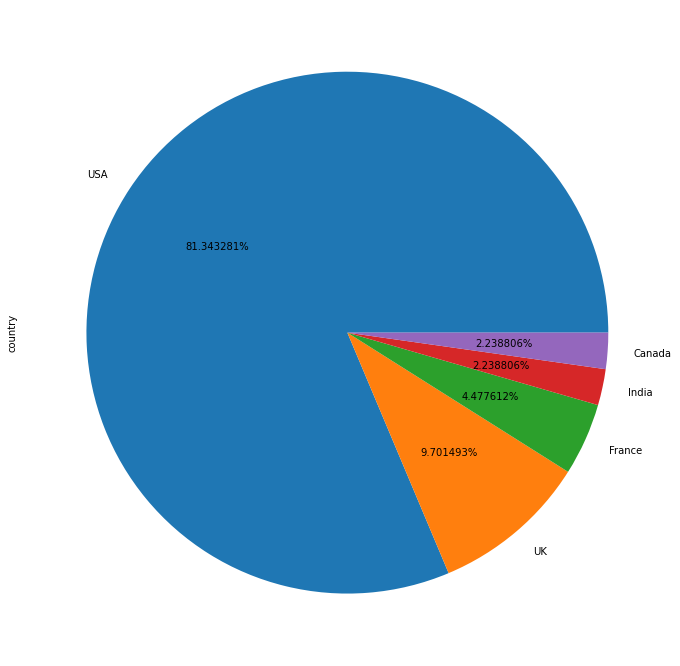

In [57]:
new_df['country'].value_counts()[:5].plot.pie(autopct="%f%%",figsize=(12,12)) # VISUALISING WITH THE HELP OF PIE CHART

In [58]:
top5_countries = new_df.groupby('country').agg({'profit in millions': 'mean'}).sort_values(by='profit in millions',ascending=False).head(5)

top5_countries   # TOP 5 COUNTRIES GENERATING MOST PROFIT WITHIN OUR BUDGET

,profit in millions
country,
USA,5.782754
Italy,4.100000
Indonesia,3.005123
UK,2.054716
Iran,0.704591


##### USA IS ALSO THE COUNTRY WHERE FILMS MAKE MOST PROFIT

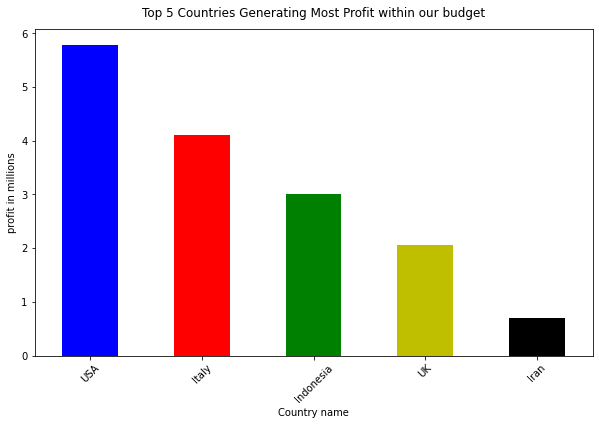

In [59]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_countries['profit in millions'].plot.bar(color=['b', 'r', 'g', 'y','k'],ax=ax)
ax.set_ylabel('profit in millions')
ax.set_title('Top 5 Countries Generating Most Profit within our budget', y=1.02) #    ## VISUALISING THE RESULTS WITH THE HELP OF BARPLOT
ax.set_xlabel('Country name')
ax.set_xticklabels(top5_countries.index, rotation = 45);

###### MY RECOMMENDATION WOULD BE TO LAUNCH THE FILM IN USA WHERE MOST FILMS ARE RELEASED AND THEY EARN MAXIMUM PROFIT

In [60]:
new_df.language.value_counts().head() # LANGUAGES IN WHICH MOST MOVIES ARE MADE WITHIN OUR BUDGET

English       129
Spanish         3
French          3
Persian         2
Indonesian      2
Name: language, dtype: int64

##### ENGLISH IS THE LANGUAGE IN WHICH MAXIMUM FILMS ARE MADE

<AxesSubplot:ylabel='language'>

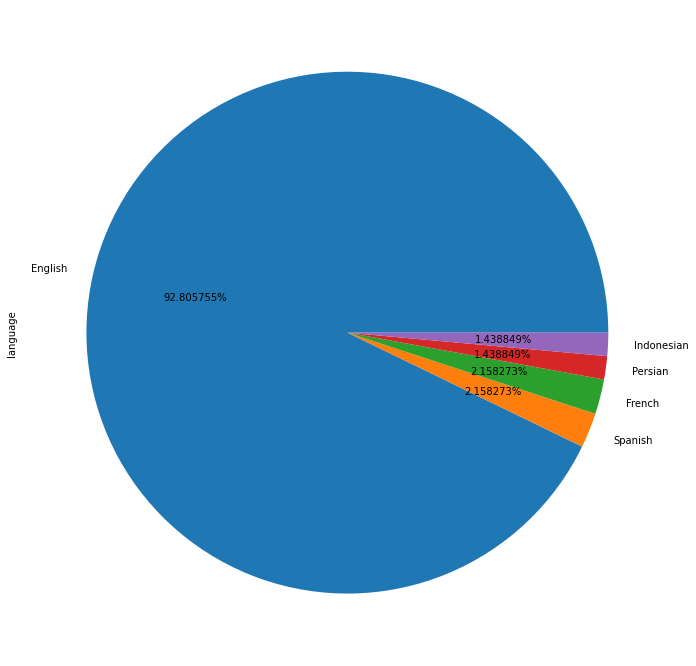

In [61]:
new_df['language'].value_counts()[:5].plot.pie(autopct="%f%%",figsize=(12,12))  # VISUALISING WITH THE HELP OF PIE CHART

In [62]:
top5_languages = new_df.groupby('language').agg({'profit in millions': 'mean'}).sort_values(by='profit in millions',ascending=False).head(5)

top5_languages # TOP 5 LANGUAGES GENERATING MOST PROFIT WITHIN OUR BUDGET

,profit in millions
language,
English,5.062316
Italian,4.100000
Indonesian,1.244672
Hindi,0.890250
Persian,0.704591


##### ENGLISH IS THE LANGUAGE THAT EARNS THE MOST PROFIT

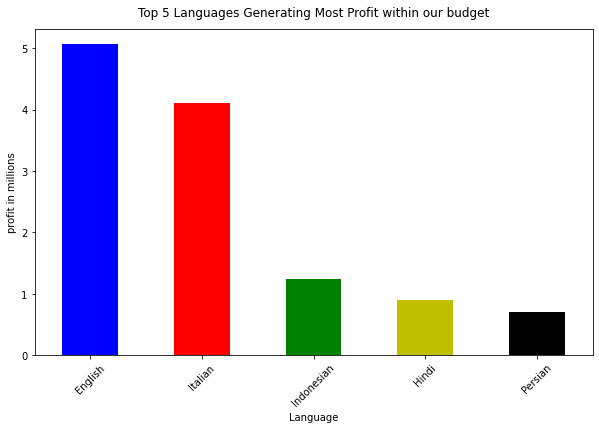

In [63]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_languages['profit in millions'].plot.bar(color=['b', 'r', 'g', 'y','k'],ax=ax)
ax.set_ylabel('profit in millions')
ax.set_title('Top 5 Languages Generating Most Profit within our budget', y=1.02) ## VISUALISING THE RESULTS WITH THE HELP OF BARPLOT
ax.set_xlabel('Language')
ax.set_xticklabels(top5_languages.index, rotation = 45);

###### MY RECOMMENDATION WOULD BE TO LAUNCH THE FILM IN ENGLISH LANGUAGE.

In [64]:
new_df.genres.value_counts().head() # MOST POPULAR GENRES WITHIN OUR BUDGET

Drama                   16
Comedy|Drama            11
Documentary             10
Comedy|Drama|Romance    10
Comedy                   7
Name: genres, dtype: int64

In [65]:
dg = new_df['genres'].str.get_dummies(sep = '|') # REMOVING |

In [66]:
dg1 = dg.sum().reset_index()

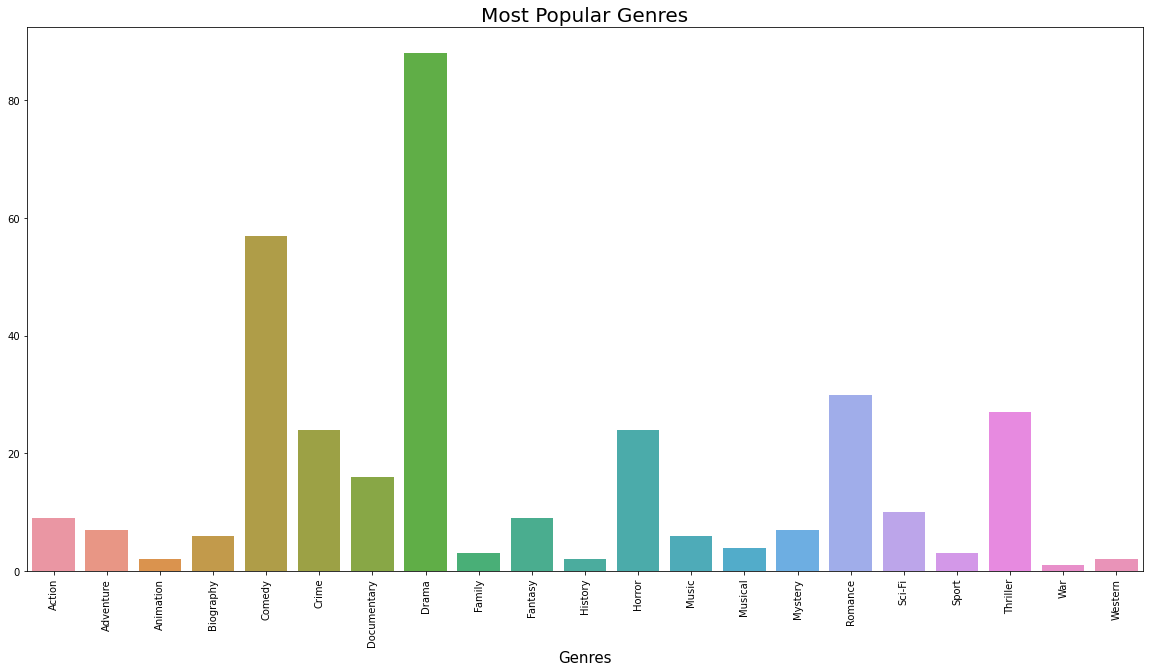

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x=dg.columns, y=dg.sum(), data=dg1)  # PLOTTING MOST POPULAR GENRES
plt.title('Most Popular Genres', fontsize = 20)
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

###### DRAMA COMEDY AND ROMANCE ARE THE MOST POPULAR GENRES ACCRORDING TO EDA

In [68]:
top5_genres = new_df.groupby('genres').agg({'profit in millions': 'mean'}).sort_values(by='profit in millions',ascending=False).head(5)

top5_genres # TOP 5 LANGUAGES GENERATING MOST PROFIT WITHIN OUR BUDGET

,profit in millions
genres,
Comedy|Drama|Music,61.161500
Fantasy|Horror|Mystery|Thriller,52.491137
Horror|Thriller,41.391823
Adventure|Family|Romance,39.052600
Horror|Mystery|Thriller,30.537320


###### COMEDY DRAMA AND MUSIC ARE THE THREE GENRES THAT GENERATES THE MOST REVENUE FOR FILMS

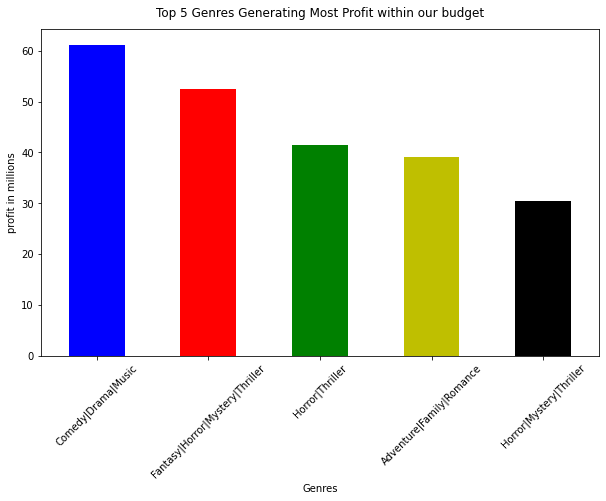

In [69]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_genres['profit in millions'].plot.bar(color=['b', 'r', 'g', 'y','k'],ax=ax)
ax.set_ylabel('profit in millions')
ax.set_title('Top 5 Genres Generating Most Profit within our budget', y=1.02) ## VISUALISING THE RESULTS WITH THE HELP OF BARPLOT
ax.set_xlabel('Genres')
ax.set_xticklabels(top5_genres.index, rotation = 45);

## HYPOTHESIS TESTING ( PROVING WHAT I PREDICTED THROUGH EDA)

In [70]:
hypo_set.head() # FIRST 5 VALUES OF HYPOTHESIS DATA

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237.0,2009.0,7.9,523.505847
1,Gore Verbinski,302.0,169.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300.0,2007.0,7.1,9.404152
2,Sam Mendes,602.0,148.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245.0,2015.0,6.8,-44.925825
3,Christopher Nolan,813.0,164.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250.0,2012.0,8.5,198.130642
5,Andrew Stanton,462.0,132.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263.7,2012.0,6.6,-190.641321


In [71]:
hypo_set.tail() # LAST 5 VALUES OF HYPOTHESIS DATA

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
5029,Kiyoshi Kurosawa,78.0,111.0,0.094596,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,50.0,Japanese,Japan,1.0000,1997.0,7.4,-0.905404
5034,Neill Dela Llana,35.0,80.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.0070,2005.0,6.3,0.063071
5035,Robert Rodriguez,56.0,81.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.0070,1992.0,6.9,2.033920
5037,Edward Burns,14.0,95.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.0090,2011.0,6.4,-0.004416
5042,Jon Gunn,43.0,90.0,0.085222,Documentary,John August,My Date with Drew,4285,84.0,English,USA,0.0011,2004.0,6.6,0.084122


In [72]:
hypo_df = hypo_set.loc[df['budget in millions'] <= 1.5] # STORING MOVIES WITH LESS THAN 1.5 MILLION BUDGET IN A NEW DATASET 
hypo_df

,director_name,num_critic_for_reviews,duration,gross in millions,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget in millions,title_year,imdb_score,profit in millions
2242,Alfred Hitchcock,290.0,108.0,32.000000,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1040.0,English,USA,0.806947,1960.0,8.5,31.193053
2420,John Carpenter,212.0,89.0,21.378000,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,1.000000,1980.0,6.8,20.378000
3821,Billy Bob Thornton,104.0,148.0,24.475416,Drama,Robert Duvall,Sling Blade,72443,309.0,English,USA,0.890000,1996.0,8.0,23.585416
3941,Robert Lee King,51.0,85.0,0.265107,Comedy|Horror|Mystery,Lauren Ambrose,Psycho Beach Party,4617,93.0,English,Australia,1.500000,2000.0,6.3,-1.234893
4198,Randall Miller,1.0,34.0,0.333658,Comedy|Family|Musical|Romance|Short,William Hurt,Marilyn Hotchkiss' Ballroom Dancing and Charm ...,97,2.0,English,USA,0.034000,1990.0,7.1,0.299658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,Kiyoshi Kurosawa,78.0,111.0,0.094596,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,50.0,Japanese,Japan,1.000000,1997.0,7.4,-0.905404
5034,Neill Dela Llana,35.0,80.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,0.007000,2005.0,6.3,0.063071
5035,Robert Rodriguez,56.0,81.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,0.007000,1992.0,6.9,2.033920
5037,Edward Burns,14.0,95.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,0.009000,2011.0,6.4,-0.004416


In [73]:
hypo_df.isnull().sum(axis=0) # CHECKING FOR NULL VALUES

director_name             0
num_critic_for_reviews    0
duration                  0
gross in millions         0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
country                   0
budget in millions        0
title_year                0
imdb_score                0
profit in millions        0
dtype: int64

In [74]:
hypo_df.describe().transpose() # OVERALL STATISTICS 

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,132.0,85.780303,90.738978,1.000000,20.750000,54.500000,112.500000,409.000000
duration,132.0,95.325758,19.545795,34.000000,86.000000,91.000000,100.000000,215.000000
gross in millions,132.0,7.006335,19.671093,0.000703,0.090577,0.624734,3.851452,140.530114
num_voted_users,132.0,33843.962121,72474.620926,27.000000,1347.750000,6346.500000,36732.000000,422432.000000
num_user_for_reviews,132.0,179.159091,369.613721,1.000000,25.250000,71.500000,189.250000,3400.000000
budget in millions,132.0,0.672742,0.484150,0.001100,0.207500,0.600000,1.000000,1.500000
title_year,132.0,1998.893939,14.830986,1933.000000,1996.000000,2002.000000,2008.000000,2015.000000
imdb_score,132.0,6.748485,0.873659,3.600000,6.300000,6.700000,7.300000,8.500000
profit in millions,132.0,6.333593,19.707922,-1.499297,-0.488804,0.114082,3.168106,140.470114


In [75]:
hypo_df.genres.value_counts().head() # MOST OCCURED GENRES

Drama                   15
Comedy|Drama            11
Comedy|Drama|Romance     9
Comedy|Romance           7
Comedy                   6
Name: genres, dtype: int64

### HYPOTHESIS
### H0 : GENRES LIKE DRAMA, COMEDY, AND ROMANCE HAVE NO SPECIAL IMPACT.
### H1 : GENRES LIKE DRAMA, COMEDY, AND ROMANCE HAVE GREAT IMPACT.

In [84]:
from scipy import stats


# T-test for the drama genre
data = hypo_df[hypo_df['genres'] == 'Drama']
data_budget = data['profit in millions']
data_budget_ttest=stats.ttest_1samp(data_budget,0,alternative='greater') 
one_tail_p = us_budget_ttest.pvalue/2 # divide by 2 since the function employs a two tail test
print ('one_tail p from scipy: ', one_tail_p)

# T-test for the Comedy|Drama|Romance genre
data = hypo_df[hypo_df['genres'] == 'Comedy|Drama|Romance']
data_budget = data['profit in millions']
data_budget_ttest=stats.ttest_1samp(data_budget,0,alternative='greater')
one_tail_p = us_budget_ttest.pvalue/2 # divide by 2 since the function employs a two tail test
print ('one_tail p from scipy: ', one_tail_p)



one_tail p from scipy:  0.012929364787321863
one_tail p from scipy:  0.012929364787321863


### Since the p-value is less than 0.05, the null hypothesis can be rejected as there is only less than 5% chance that it would be true. Therefore, the genres like comedy drama and romance are well proven as we saw the same in our exploratory data analysis as well so we should make our upcoming film focussing on these genres.

### CONCLUSIONS AND RECOMMENDATIONS TO GET MAXIMUM REVENUE OUT OF A FILM OF 1.5 MILLION GBP BUDGET


###### MY RECOMMENDATION WOULD BE TO SELECT JOHN CARPENTER AS THE DIRECTOR BECAUSE HE IS COMMON IN DIRECTORS WHO DIRECTED MOST MOVIES AND IN THE LIST OF DIRECTORS WHO GENERATED MOST PROFIT IN THEIR FILMS¶ (EDA)

###### MY RECOMMENDATION WOULD BE TO SELECT JAMIE LEE CURTIS AS THE LEAD ACTOR BECAUSE HE IS COMMON IN ACTORS WHO DIRECTED MOST MOVIES AND IN THE LIST OF TOP 5 ACTORS GENERATING MOST PROFIT FOR THEIR FILMS¶ (EDA)

###### MY RECOMMENDATION WOULD BE TO LAUNCH THE FILM IN USA WHERE MOST FILMS ARE RELEASED AND THEY EARN MAXIMUM PROFIT (EDA)

###### ACCORDING TO ME ROMANCE,COMEDY AND DRAMA GENRES WOULD BE BEST TO GO FOR (HYPOTHESIS + EDA)

######  MY RECOMMENDATION WOULD BE TO LAUNCH THE FILM IN ENGLISH LANGUAGE. (EDA)
###### I AM SURE THAT IF THE FILM STUDIO FOLLOWS ALL THESE ADVICES THEY WILL SURELY EARN GOOD PROFIT FROM THEIR UPCOMING MOVIE